# Milestone 2 Phase 2

# 1 - Perkenalan

> Bab pengenalan harus diisi dengan identitas, gambaran besar dataset yang digunakan, dan objective yang ingin dicapai.

> Name : Dzikri Furqoni Arief

> Batch : FTDS-018-RMT

> Task : Milestone 2

> Dataset : `https://www.kaggle.com/datasets/samuelcortinhas/cats-and-dogs-image-classification` 

> Objective :

- Untuk Mengidentifikasi apakah objek gambar merupakan Cats atau Dogs dengan menggunakan Convolutional neural network.

# 2 - Import Library

> Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

In [1]:
import os
import glob 
import humanize
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import pathlib
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Functional, clone_model
from keras.layers import Dropout, Dense, BatchNormalization, Input, concatenate, Flatten, Conv2D, MaxPool2D, Activation
from keras import regularizers, initializers, Model
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras import regularizers, initializers, Model
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

Berikut adalah Library yang digunakan pada project ini

In [2]:
!pip install --upgrade keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install -q kaggle

In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dzikrifurqoni","key":"af6422495f08096faf16b84b09311a77"}'}

# 3 - Data Loading

> Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

In [5]:
! mkdir ~/.kaggle

In [6]:
! cp kaggle.json ~/.kaggle/

In [7]:
! chmod 600 ~/.kaggle/kaggle.json

In [8]:
!kaggle datasets download -d samuelcortinhas/cats-and-dogs-image-classification

 88% 57.0M/64.4M [00:00<00:00, 163MB/s]
100% 64.4M/64.4M [00:00<00:00, 166MB/s]


In [9]:
! unzip cats-and-dogs-image-classification.zip

Archive:  cats-and-dogs-image-classification.zip
  inflating: test/cats/cat_1.jpg     
  inflating: test/cats/cat_106.jpg   
  inflating: test/cats/cat_109.jpg   
  inflating: test/cats/cat_113.jpg   
  inflating: test/cats/cat_114.jpg   
  inflating: test/cats/cat_116.jpg   
  inflating: test/cats/cat_118.jpg   
  inflating: test/cats/cat_119.jpg   
  inflating: test/cats/cat_124.jpg   
  inflating: test/cats/cat_140.jpg   
  inflating: test/cats/cat_147.jpg   
  inflating: test/cats/cat_156.jpg   
  inflating: test/cats/cat_158.jpg   
  inflating: test/cats/cat_162.jpg   
  inflating: test/cats/cat_18.jpg    
  inflating: test/cats/cat_190.jpg   
  inflating: test/cats/cat_203.jpg   
  inflating: test/cats/cat_223.jpg   
  inflating: test/cats/cat_234.jpg   
  inflating: test/cats/cat_244.jpg   
  inflating: test/cats/cat_251.jpg   
  inflating: test/cats/cat_255.jpg   
  inflating: test/cats/cat_268.jpg   
  inflating: test/cats/cat_279.jpg   
  inflating: test/cats/cat_281.jpg   
 

Melakukan Unzip untuk semua data yang akan digunakan pada pekerjaan ini, semua file dengan format extensi .jpg

# 4 - Exploratory Data Analysis (EDA)

> Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

In [10]:
# Define path or directory of files

train_path = "/content/train"
test_path = "/content/test"
train_cats_path = "/content/train/cats"
train_dogs_path = "/content/train/dogs"
test_cats_path = "/content/test/cats"
test_dogs_path = "/content/test/dogs"

train_path = pathlib.Path(train_path)
test_path = pathlib.Path(test_path)
train_cats_path = pathlib.Path(train_cats_path)
train_dogs_path = pathlib.Path(train_dogs_path)
test_cats_path = pathlib.Path(test_cats_path)
test_dogs_path = pathlib.Path(test_dogs_path)

membuat path untuk masing-masing train set dan test set data

## 4.1 - Mengecek jumlah file dari masing-masing dataset dan melihat class yang ada. 

In [11]:
def check_dir(dir=None, labels=None):
  for label in labels:
    num_data= len(os.listdir(os.path.join(dir, label)))
    print(f'jumlah {label} : {num_data}')

print('train set: \n' + '='*50) 
check_dir(train_path,['cats','dogs'])

print('\ntest set: \n' + '='*50) 
check_dir(test_path,['cats','dogs'])

train set: 
jumlah cats : 279
jumlah dogs : 278

test set: 
jumlah cats : 70
jumlah dogs : 70


Dari Informasi di atas diketahui bahwa dalam folder data train total sebanyak 557 gambar, Dan di dalam folder data train tersebut terdapat 2 folder lagi yaitu cats dan dogs, yang pada kolom cats berisi 279 gambar dan 278 gambar pada kolom dogs.

Dan dari Informasi di atas diketahui bahwa dalam folder data test total sebanyak 140 gambar, Dan di dalam folder data train tersebut terdapat 2 folder lagi yaitu cats dan dogs, yang pada kolom cats berisi 70 gambar dan 70 gambar pada kolom dogs. maka jumlah keseluruhan jika train dan test digabung terdapat 697 gambar.

In [12]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
data_dir = pathlib.Path(train_path) 
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['cats' 'dogs']


Diketahu terdapat 2 class, yaitu class cats and dogs.

## 4.2 - Mengecek Ukuran file dari data yang digunakan.

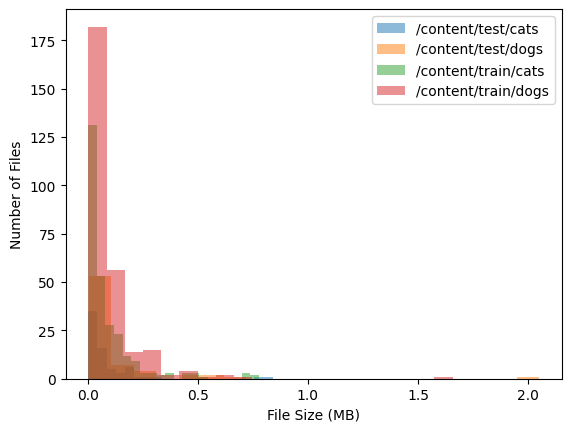

In [13]:
# Path direktori tempat data gambar berada
dir_paths = [
    '/content/test/cats',
    '/content/test/dogs',
    '/content/train/cats',
    '/content/train/dogs'
]

# Buat list yang akan berisi ukuran file dari setiap gambar untuk setiap direktori
file_sizes = [[] for _ in range(len(dir_paths))]

# Iterasi pada setiap file di setiap direktori dan hitung ukurannya
for i, dir_path in enumerate(dir_paths):
    for file in os.listdir(dir_path):
        file_sizes[i].append(os.path.getsize(os.path.join(dir_path, file)))

    # Konversi ukuran file dari byte ke megabyte
    file_sizes[i] = [size/(1024*1024) for size in file_sizes[i]]

    # Tampilkan histogram ukuran file
    plt.hist(file_sizes[i], bins=20, alpha=0.5, label=dir_path)

plt.xlabel('File Size (MB)')
plt.ylabel('Number of Files')
plt.legend()
plt.show()

Dari Informasi Histogram di atas dapat kita lihat informasi bahwa data gambar yang kita gunakan paling banyak berada pada size 0,1 mb - 0,3 mb. dan yang paling banyak adalah pada 0,1 mb untuk gambar pada folder train-set label dogs. Dan untuk file yg ukuranya paling besar adalah 2.0 mb yang berada pada folder test-set untuk label cats.  

## 4.3 - Menampilkan 5 gambar dari masing-masing class

Class: cats


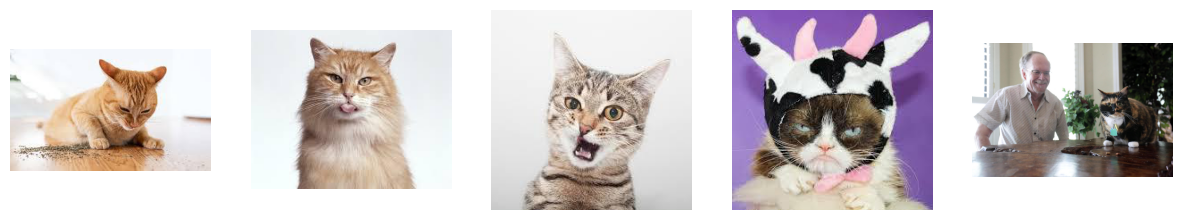

Class: dogs


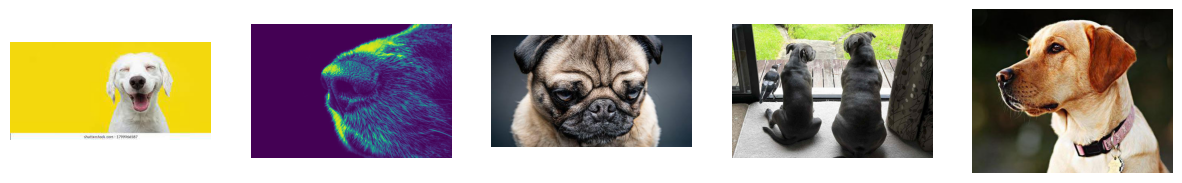

In [14]:
dir_path = '/content/train'

# list semua nama file di direktori
files = os.listdir(dir_path)

# buat dictionary untuk menyimpan nama file berdasarkan class
class_files = {'cats': [], 'dogs': []}

# iterasi pada setiap file dan tambahkan ke dictionary sesuai classnya
for file in files:
    if os.path.isdir(os.path.join(dir_path, file)):
        for f in os.listdir(os.path.join(dir_path, file)):
            if 'cat' in f:
                class_files['cats'].append(os.path.join(file, f))
            else:
                class_files['dogs'].append(os.path.join(file, f))

# tampilkan 5 gambar random dari setiap class
for class_name in class_files:
    print(f"Class: {class_name}")
    plt.figure(figsize=(15,5))
    for i in range(5):
        file = random.choice(class_files[class_name])
        img = plt.imread(os.path.join(dir_path, file))
        plt.subplot(1, 5, i+1)
        plt.imshow(img)
        plt.axis('off')
    plt.show()

Dari Data gambar yang ditampilkan di atas dapat kita lihat dengan jelas perbedaan dari ciri-ciri dogs dan cats, berikut adalah ciri-ciri dari masing-masing hewan

- Dogs: 
  1. Memiliki kuping yang lebih panjang
  2. Ukuranya Lebih Besar Daripada Kucing
  3. Hidungnya sangat maju seperti memiliki moncong ke arah depan.
  4. Cenderung Memiliki bentuh tubuh yang lebih berotot

- Cats:
  1. Memiliki kuping yang pendek 
  2. Ukuran badanya juga lebih kecil daripada anjing
  3. Hidungnya terlihat lebih pesek, walaupun jenis kucing non ras, teteap bentuk kepala kucing hidungnya tidak menjorok ke luar seperti anjing.
  4. Cenderung memiliki tubuh yang lebih berisi dan berlemak.

## 4.4 -Membuat Label Untuk Gambar

In [15]:
def visualize_img(random_data, labels=None):
  fig, axes= plt.subplots(1,5, figsize=(15,12))
  for i, image_path in enumerate(random_data):
    image= plt.imread(image_path)
    axes[i].imshow(image, cmap='gray') # bisa tanpa cmap kalau bener2 RGB
    axes[i].set_title(f'{labels}, {image.shape}')
    axes[i].axis('off')
  plt.show()

In [16]:
train_val_data = {'path': [], 'filename': [], 'label': []}

for dirpath, dirnames, filenames in os.walk(train_path):
    for f in filenames:
        train_val_data['path'].append(os.path.join(dirpath, f))
        train_val_data['filename'].append(f)
        label = os.path.basename(dirpath).replace('_', ' ')
        train_val_data['label'].append(label)

In [17]:
train_val_data_df = pd.DataFrame(train_val_data)
train_val_data_df

,path,filename,label
0,/content/train/cats/cat_70.jpg,cat_70.jpg,cats
1,/content/train/cats/cat_172.jpg,cat_172.jpg,cats
2,/content/train/cats/cat_289.jpg,cat_289.jpg,cats
3,/content/train/cats/cat_452.jpg,cat_452.jpg,cats
4,/content/train/cats/cat_303.jpg,cat_303.jpg,cats
...,...,...,...
552,/content/train/dogs/dog_509.jpg,dog_509.jpg,dogs
553,/content/train/dogs/dog_504.jpg,dog_504.jpg,dogs
554,/content/train/dogs/dog_287.jpg,dog_287.jpg,dogs
555,/content/train/dogs/dog_26.jpg,dog_26.jpg,dogs


In [18]:
test_data = {'path': [], 'filename': [], 'label': []}

for dirpath, dirnames, filenames in os.walk(test_path):
    for f in filenames:
        test_data['path'].append(os.path.join(dirpath, f))
        test_data['filename'].append(f)
        label = os.path.basename(dirpath).replace('_', ' ')
        test_data['label'].append(label)

In [19]:
test_data_df = pd.DataFrame(test_data)
test_data_df

,path,filename,label
0,/content/test/cats/cat_342.jpg,cat_342.jpg,cats
1,/content/test/cats/cat_433.jpg,cat_433.jpg,cats
2,/content/test/cats/cat_281.jpg,cat_281.jpg,cats
3,/content/test/cats/cat_114.jpg,cat_114.jpg,cats
4,/content/test/cats/cat_251.jpg,cat_251.jpg,cats
...,...,...,...
135,/content/test/dogs/dog_89.jpg,dog_89.jpg,dogs
136,/content/test/dogs/dog_303.jpg,dog_303.jpg,dogs
137,/content/test/dogs/dog_177.jpg,dog_177.jpg,dogs
138,/content/test/dogs/dog_472.jpg,dog_472.jpg,dogs


In [20]:
train_val_data_df['label'].value_counts()

cats    279
dogs    278
Name: label, dtype: int64

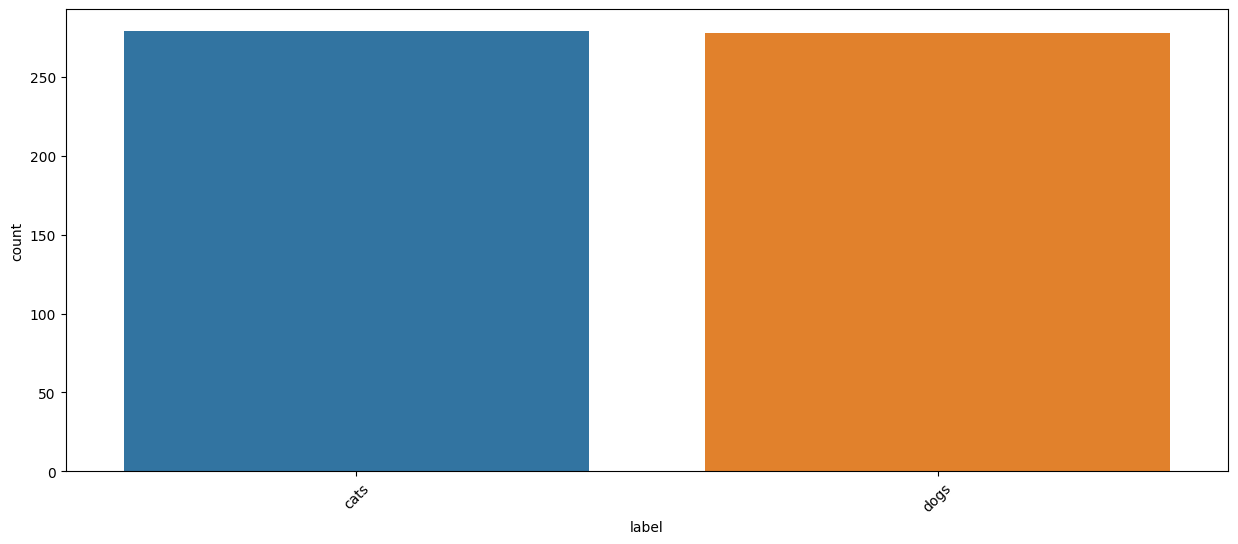

In [21]:
plt.figure(figsize = (15,6))
#data_df['label'].value_counts().plot(kind='barh')
sns_cntplot = sns.countplot(x='label', data=train_val_data_df)
plt.xticks(rotation=45);

Dari data di atas Dapat kita lihat proporsi untuk data label pada data ini, Data ini diambil dari data train karena memiliki data yang terbanyak dan sangat representatif jika digunakan sebagai EDA, Untuk Data Label ini sendiri terbagi dengan cukup merata, dengan proporsi 50%-50%. Untuk Label cats Memiliki jumlah data sebanyak 279 gambar dan label dogs sebanyak 278 gambar. Dengan balance nya data seharusnya membuat proses modeling menjadi lebih baik karena model akan mendapatkan training dalam porsi yang sama untuk masing-masing labelnya.

## 4.5 - Cek Shapes Dari data

In [22]:
shapes_train = [] 

for _, d in train_val_data_df.iterrows():
    img = load_img(d['path'])
    shapes_train.append(img.size)
    #images.append(img_to_array(img))
    #label.append(d['label'])

In [23]:
shapes_train = pd.DataFrame(data = shapes_train, columns = ['H', 'W'], dtype='int64')
shapes_train['Size'] = + shapes_train['H'] *shapes_train['W']

In [24]:
shapes_train.describe()

,H,W,Size
count,557.000000,557.000000,5.570000e+02
mean,952.464991,657.195691,9.716492e+05
std,717.620221,544.972839,1.659665e+06
min,133.000000,133.000000,2.660000e+04
25%,307.000000,225.000000,5.062500e+04
50%,800.000000,549.000000,4.563000e+05
75%,1200.000000,892.000000,1.051200e+06
max,4272.000000,4272.000000,1.404634e+07


> Dari data EDA tersebut, kita bisa mendapatkan beberapa insight sebagai berikut:

- Terdapat 557 data yang berhasil diambil dan diukur ukurannya.
- Rata-rata lebar gambar adalah 952 pixel dan tinggi gambar adalah 657 pixel.
- Standar deviasi lebar gambar adalah 717 pixel dan tinggi gambar adalah 544 pixel. Ini menunjukkan bahwa sebaran data pada lebar dan tinggi gambar cukup besar.
- Ukuran minimum gambar adalah 133 pixel x 133 pixel dengan ukuran file sekitar 26.600 bytes. Ini menunjukkan bahwa terdapat variasi ukuran gambar yang cukup besar.
- Nilai median lebar gambar adalah 800 pixel dan tinggi gambar adalah 549 pixel. Ini menunjukkan bahwa sebagian besar gambar memiliki ukuran yang relatif besar.
- Kuartil pertama lebar gambar adalah 307 pixel dan tinggi gambar adalah 225 pixel. Kuartil ketiga lebar gambar adalah 1200 pixel dan tinggi gambar adalah 892 pixel. Hal ini menunjukkan bahwa 50% data memiliki ukuran yang lebih kecil dari 1200 x 892 pixel.
- Ukuran maksimum gambar adalah 4272 pixel x 4272 pixel dengan ukuran file sekitar 14.046.340 bytes. Ini menunjukkan bahwa terdapat variasi ukuran gambar yang sangat besar.

# 5- Feature Engineering

> Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-val-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

## 5.1 Tensorflow Pipeline.

In [25]:
img_height= 220
img_width= 220
batch_size= 128

In [26]:
# Preprocess data
train_datagen = ImageDataGenerator(rescale=1./255)
train_datagen_augmented = ImageDataGenerator(rescale=1./255,
                                             rotation_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)
valid_datagen = ImageDataGenerator(rescale=1./255)

testGen = ImageDataGenerator(
    rescale = 1./255
)

train_ds= tf.keras.preprocessing.image_dataset_from_directory(
    train_path,
    validation_split= 0.2,
    subset='training',
    seed=123,
    image_size=(img_height,img_width),
    batch_size= batch_size
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_path,
    validation_split= 0.2,
    subset='validation',
    seed=123,
    image_size=(img_height,img_width),
    batch_size= batch_size,
    shuffle=False
)

test_ds = testGen.flow_from_dataframe(dataframe = test_data_df,
                                     x_col = 'path',
                                     y_col = 'label',
                                     target_size = (img_height,img_width),
                                     class_mode = 'binary',
                                     batch_size = batch_size,
                                     image_size=(img_height,img_width),
                                     shuffle = False)

Found 557 files belonging to 2 classes.
Using 446 files for training.
Found 557 files belonging to 2 classes.
Using 111 files for validation.
Found 140 validated image filenames belonging to 2 classes.


- Saya membuat dataset dari gambar yang ada di direktori, Dataset tersebut dibagi menjadi tiga bagian yaitu dataset training, dataset validation, dan test dataset. 

- Dataset ini akan digunakan oleh model selama proses pelatihan, dan test dataset digunakan untuk menguji performa model pada model evaluation.

- Selain itu, saya juga melakukan resizing gambar menjadi ukuran yang sama, yaitu img_height x img_width piksel (220x220). Splitting ini membagi data training menjadi subset training dan validation dengan perbandingan 80:20. Batch size juga ditentukan, yaitu sebesar 64 gambar per batch.

 ## 5-2. caching dan prefetching

In [27]:
for image_batch , label_batch in train_ds:
  print(image_batch.shape)
  print(label_batch.shape)
  break

(128, 220, 220, 3)
(128,)


In [28]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)

- Proses ini akan membuat `train_ds.cache()` dan `val_ds.cache()` menyimpan dataset pada cache setelah di-load, sehingga pada iterasi selanjutnya, data akan diambil dari cache, bukan dari file sistem, sehingga akan mempercepat proses training.

- saya menggunakan `train_ds.shuffle(1000)`, fungsinya untuk memilih 1000 item acak dari dataset untuk dimuat ke dalam cache, sehingga mengurangi kemungkinan terjadi overfitting.

- `train_ds.prefetch(buffer_size=AUTOTUNE)` dan `val_ds.prefetch(buffer_size=AUTOTUNE)` digunakan untuk melakukan prefetching. Dengan menggunakan nilai AUTOTUNE, TensorFlow akan menyesuaikan ukuran prefetch buffer secara otomatis untuk mengoptimalkan penggunaan sumber daya sistem. Dengan prefetching, TensorFlow akan memuat batch berikutnya dari dataset ke dalam memori GPU/CPU, sementara batch saat ini sedang diolah, sehingga meminimalkan waktu delay antara batch yang sedang diolah dan batch berikutnya yang sedang dimuat. Hal ini mempercepat proses training model.

## 5.3 - Data Augmentation

In [29]:
inputs= (img_height, img_width,3)
data_aug= Sequential(
    [
      layers.RandomFlip('horizontal',
                          input_shape=inputs),
      layers.RandomRotation(0.1),
      layers.RandomZoom(0.1),
    ]
)

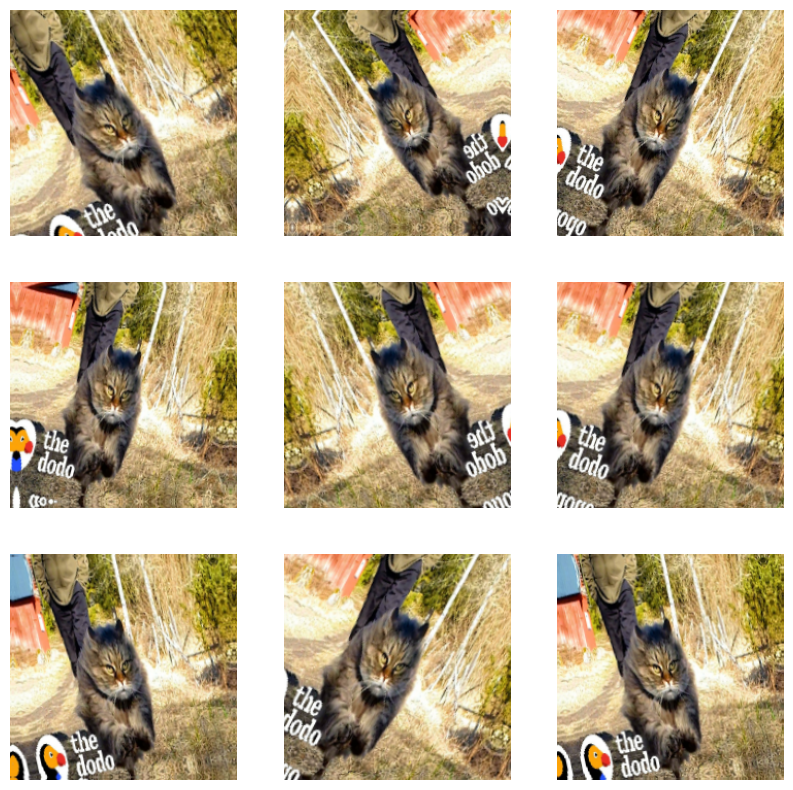

In [30]:
plt.figure(figsize=(10,10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_img= data_aug(images)
    ax=plt.subplot(3, 3, i +1)
    plt.imshow(augmented_img[0].numpy().astype('uint8'))
    plt.axis('off')

- Dari Gambar di atas dapat kita lihat gambar hasil dari data augmentation. Data augmentation ini saya lakukan dengan menggunakan tiga lapisan: RandomFlip, RandomRotation, dan RandomZoom.

- RandomFlip melakukan flip acak horizontal pada gambar, sehingga menghasilkan versi cermin horizontal dari gambar asli. RandomRotation melakukan rotasi acak pada gambar sebesar 0,1 radian. RandomZoom melakukan zoom acak pada gambar sebesar 0,1.

- Data augmentation ini saya gunakan agar model menjadi lebih robust dan memiliki kemampuan generalisasi yang lebih baik, sehingga dapat lebih baik dalam mengatasi situasi yang tidak terlihat pada data pelatihan.

# 6 - Model Definition

> Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

Pada project kali ini karena obejctive kita adalah `untuk Mengidentifikasi apakah objek merupakan Cats atau Dogs dengan menggunakan Convolutional neural network` Maka Model yang akan saya Buat adalah dengan: 
  
- CNN - Sequential API

Yang Selanjutnya Akan dibuat Base Model dan Improvement Model.


# 7 - Model Training

> Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

## 7.1 - CNN Sequntial API Base Model

Model yang saya buat terdiri dari 4 layer konvolusi dengan masing-masing 16, 32, 64, dan 128 filter dan ukuran kernel 3x3. Setelah setiap layer konvolusi, digunakan layer BatchNormalization untuk mempercepat training dan mengurangi overfitting. Kemudian dilakukan pooling menggunakan MaxPooling2D. Setelah itu, dilakukan dropout pada layer 7 dengan nilai 0.2 dan dilakukan flatten untuk meratakan output. Terakhir, dilakukan 2 layer Dense yaitu 1 hidden layer dengan 128 neuron dan 1 output layer dengan 1 neuron.

In [31]:
from keras.optimizers import SGD
from keras.layers import BatchNormalization

model1 = Sequential([
  data_aug,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.001)),
  layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2, 2), padding="valid"),
  layers.Conv2D(32, 3, padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.001)),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.001)),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.001)),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
  layers.BatchNormalization(),
  layers.Dense(units=1, activation='sigmoid')
])

optimizer = SGD(learning_rate=0.01, momentum=0.9)
model1.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

Optimizer yang saya gunakan adalah SGD (Stochastic Gradient Descent) dengan learning rate 0.01 dan momentum 0.9. Tujuan digunakanya adalah untuk mengontrol seberapa besar update bobot pada setiap iterasi training dan mempercepat proses training.

Loss function yang digunakan adalah binary_crossentropy Karena merupakan loss function yang paling umum digunakan.

Dan Metric yang digunakan untuk evaluasi model adalah akurasi (accuracy) karena data yang saya gunakan memiliki data pada masing-masing label yang cukup balance.

In [32]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 220, 220, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 220, 220, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 220, 220, 16)      448       
                                                                 
 batch_normalization (BatchN  (None, 220, 220, 16)     64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 110, 110, 32)     

In [33]:
epochs= 100
history_1= model1.fit(
    train_ds,
    validation_data= val_ds,
    epochs=epochs
)

Epoch 1/100
4/4 [==============================] - 18s 758ms/step - loss: 1.2898 - accuracy: 0.5426 - val_loss: 1.1001 - val_accuracy: 0.5381
Epoch 2/100
4/4 [==============================] - 1s 248ms/step - loss: 1.2085 - accuracy: 0.6323 - val_loss: 1.0986 - val_accuracy: 0.5269
Epoch 3/100
4/4 [==============================] - 1s 284ms/step - loss: 1.0621 - accuracy: 0.7242 - val_loss: 1.1063 - val_accuracy: 0.5202
Epoch 4/100
4/4 [==============================] - 1s 245ms/step - loss: 1.0343 - accuracy: 0.7040 - val_loss: 1.0997 - val_accuracy: 0.5448
Epoch 5/100
4/4 [==============================] - 1s 246ms/step - loss: 0.9605 - accuracy: 0.7130 - val_loss: 1.1106 - val_accuracy: 0.5202
Epoch 6/100
4/4 [==============================] - 1s 292ms/step - loss: 0.8650 - accuracy: 0.7848 - val_loss: 1.0940 - val_accuracy: 0.5807
Epoch 7/100
4/4 [==============================] - 1s 283ms/step - loss: 0.8992 - accuracy: 0.7601 - val_loss: 1.0850 - val_accuracy: 0.5852
Epoch 8/100


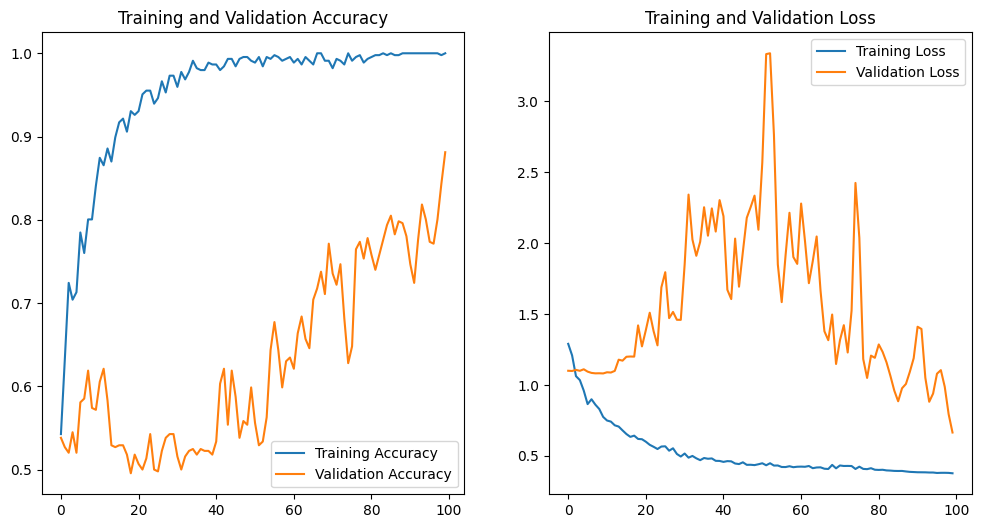

In [34]:
acc = history_1.history['accuracy']
val_acc = history_1.history['val_accuracy']

loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Dapat Kita lihat Hasil dari Base Model dengan CNN Sequntial API Base Model, hasilnya menunjukan performansi model yang masih jauh dari good-fit, Terdapat gap yang besar antara Train Accuracy dan juga val accuracy, modelnya juga cenderung tidak stabil, Memiliki nilai accuracy yang tinggi tetapi cenderung modelnya Overfit. Untuk Los dan val loss memiliki gap yang besar di epoch awal tetapi berdekatan di akhir epoch, tetapi nilai loss nya masih tinggi yaitu di kisaran 0.5. Untuk model ini sendiri memiliki nilai val_accuracy 0.88 dan val loss 0.66 Maka kita akan mencoba untuk melakukan improvement pada model ini untuk mendapatkan performansi yang lebih baik. 

## 7.2 - CNN Sequntial API Model Improvement

In [35]:
# Clear Session

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

Model yang saya buat menggunakan layer konvolusi sebagai hidden layer, dengan jumlah filter berturut-turut adalah 16, 32, 64, dan 128. Setiap layer konvolusi ini diikuti dengan layer MaxPooling2D. Kemudian, setelah layer terakhir konvolusi, ada layer dropout dengan nilai 0.2. Selanjutnya, hasilnya dilanjutkan dengan layer flatten dan dua layer dense sebagai output layer, dengan jumlah neuron berturut-turut adalah 128 dan 1 (dengan aktivasi sigmoid). Oleh karena itu, model2 mempunyai total 4 hidden layer dan jumlah neuron pada masing-masing hidden layer berurutan adalah 16, 32, 64, dan 128, yang menggunakan activation ReLu di setiap hidden layernya.

In [36]:
model2 = Sequential([
  data_aug,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2, 2), padding="valid"),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(units=1,activation='sigmoid')
  # layers.Dense(num_classes, name="outputs")
])

model2.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy'])

Untuk optimizer dan loss function pada Improved model ini yang saya gunakan adalah `adam` dan `binary_crossentropy` yang merupakan salah satu optimizer dan loss function yang populer pada deep learning, Dan juga yang menunjukan hasil yang paling baik dari trial dan Error yang saya gunakan. 

Dan Metric yang digunakan untuk evaluasi model adalah akurasi (accuracy) karena data yang saya gunakan memiliki data pada masing-masing label yang cukup balance.

In [37]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 220, 220, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 220, 220, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 220, 220, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 110, 110, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 55, 55, 32)       0         
 2D)                                                    

In [38]:
epochs= 100
history_2= model2.fit(
    train_ds,
    validation_data= val_ds,
    epochs=epochs
)

Epoch 1/100
4/4 [==============================] - 5s 277ms/step - loss: 0.8998 - accuracy: 0.4933 - val_loss: 0.7067 - val_accuracy: 0.5000
Epoch 2/100
4/4 [==============================] - 1s 189ms/step - loss: 0.7349 - accuracy: 0.4888 - val_loss: 0.6950 - val_accuracy: 0.5022
Epoch 3/100
4/4 [==============================] - 1s 184ms/step - loss: 0.6904 - accuracy: 0.5493 - val_loss: 0.6871 - val_accuracy: 0.5919
Epoch 4/100
4/4 [==============================] - 1s 185ms/step - loss: 0.6847 - accuracy: 0.5448 - val_loss: 0.6845 - val_accuracy: 0.5090
Epoch 5/100
4/4 [==============================] - 1s 184ms/step - loss: 0.6810 - accuracy: 0.5426 - val_loss: 0.7069 - val_accuracy: 0.5045
Epoch 6/100
4/4 [==============================] - 1s 213ms/step - loss: 0.6817 - accuracy: 0.5426 - val_loss: 0.6688 - val_accuracy: 0.6009
Epoch 7/100
4/4 [==============================] - 1s 184ms/step - loss: 0.6698 - accuracy: 0.6054 - val_loss: 0.6612 - val_accuracy: 0.6300
Epoch 8/100
4

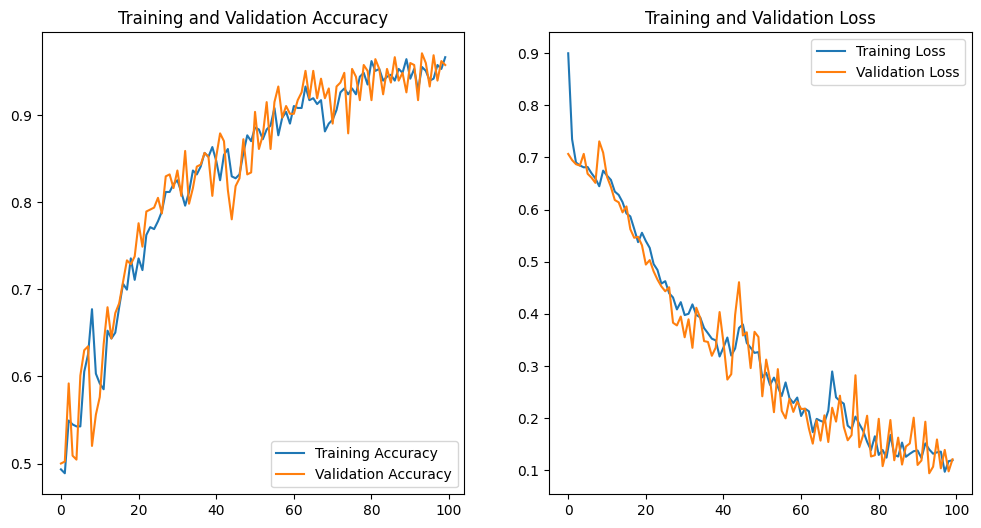

In [39]:
acc = history_2.history['accuracy']
val_acc = history_2.history['val_accuracy']

loss = history_2.history['loss']
val_loss = history_2.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Dapat Kita lihat Hasil dari CNN Sequntial API Model Improvement, hasilnya menunjukan performansi model yang good-fit, Meskipun modelnya tidak cukup stabil tetapi memiliki nilai accuracy dan val accuracy yg tinggi, untuk val loss dan loss juga nilainya cukup rendah yaitu dibawah 0.1. Model ini memiliki val_accuracy 0.95 dan memiliki val_loss 0.12.

Jika mengacu pada performa model training dari base model Maka dapat dikatakan improvement yang saya lakukan cukup sukses karena semua skor performanya naik. tetapi untuk selanjutnya model ini akan dilakukan Evaluasi menggunakan test-set untuk melihat performa aslinya.

## 7.3 - Model Improvement Transfer Learning

In [40]:
# Clear Session

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [41]:
callbacks2 = [
    EarlyStopping(monitor='val_loss', patience= 3),
    ModelCheckpoint('model_best2.hdf5', monitor='val_loss', save_best_only=True)
]

pretrained_model = tf.keras.applications.Xception(include_top=False, 
                                                  input_shape=inputs,pooling='avg')
pretrained_model.trainable = False

83683744/83683744 [==============================] - 0s 0us/step


- include_top = False berati tidak menggunakan fully connected layer, jadi harus membuat fully connected layer yang baru.
- pretrained_model.trainable = False artinya saya menggunakan bobot model yg sudah dilatih agar tidak dilatih ulang.
- menggunakan 2 jenis callback, yaitu EarlyStopping dan ModelCheckpoint, yang akan membantu dalam mengoptimalkan performa model dan mencegah overfitting

In [42]:
model_tf= Sequential()
model_tf.add(pretrained_model)

#fully connected layer
model_tf.add(Flatten())
model_tf.add(Dense(64, activation='relu')),
model_tf.add(Dense(128, activation='relu')),
model_tf.add(Dense(units=1,activation='sigmoid'))

# Compile model
model_tf.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy'])

# Summary model
model_tf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 2048)              20861480  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 64)                131136    
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 21,001,065
Trainable params: 139,585
Non-trainable params: 20,861,480
_________________________________________________________________


Fully connected layer ini terdiri dari dua lapisan Dense, dimana lapisan pertama memiliki 128 neuron dengan fungsi aktivasi ReLU, dan lapisan terakhir memiliki satu unit dengan fungsi aktivasi sigmoid. Model ini digunakan untuk melakukan klasifikasi biner pada suatu dataset gambar.

In [43]:
model_tf.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy'])

In [44]:
model_tf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 2048)              20861480  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 64)                131136    
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 21,001,065
Trainable params: 139,585
Non-trainable params: 20,861,480
_________________________________________________________________


In [45]:
epochs= 40 
history_3= model_tf.fit(
    train_ds,
    validation_data= val_ds,
    epochs=epochs
)

Epoch 1/40
4/4 [==============================] - 17s 2s/step - loss: 2.1090 - accuracy: 0.5202 - val_loss: 1.6843 - val_accuracy: 0.5359
Epoch 2/40
4/4 [==============================] - 4s 1s/step - loss: 1.0809 - accuracy: 0.5448 - val_loss: 1.3116 - val_accuracy: 0.5426
Epoch 3/40
4/4 [==============================] - 3s 908ms/step - loss: 0.9756 - accuracy: 0.5605 - val_loss: 1.0286 - val_accuracy: 0.5695
Epoch 4/40
4/4 [==============================] - 3s 901ms/step - loss: 0.9044 - accuracy: 0.5740 - val_loss: 0.7377 - val_accuracy: 0.5942
Epoch 5/40
4/4 [==============================] - 3s 901ms/step - loss: 0.7855 - accuracy: 0.5897 - val_loss: 0.6256 - val_accuracy: 0.6435
Epoch 6/40
4/4 [==============================] - 3s 904ms/step - loss: 0.6725 - accuracy: 0.6300 - val_loss: 0.6169 - val_accuracy: 0.6525
Epoch 7/40
4/4 [==============================] - 3s 903ms/step - loss: 0.6674 - accuracy: 0.6457 - val_loss: 0.6538 - val_accuracy: 0.6300
Epoch 8/40
4/4 [=========

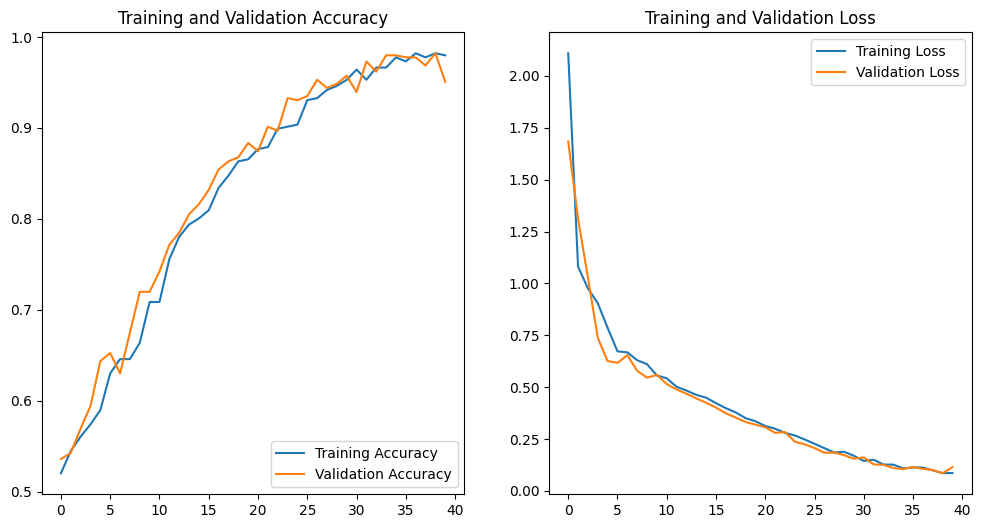

In [46]:
acc = history_3.history['accuracy']
val_acc = history_3.history['val_accuracy']

loss = history_3.history['loss']
val_loss = history_3.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

pada model transfer learning, saya membuat Fully connected layer ini terdiri dari dua lapisan Dense, dimana lapisan pertama memiliki 128 neuron dengan fungsi aktivasi ReLU, dan lapisan terakhir memiliki satu unit dengan fungsi aktivasi sigmoid. Model ini digunakan untuk melakukan klasifikasi biner pada suatu dataset gambar.

model tersebut nantinya di-*compile* dengan `optimizer = adam` dan `loss=binary_crossentropy` yang digunakan untuk mencari kelas di 2 kelas saja, serta metrik pengujinya ialah `accuracy` dikarenakan data set yang digunakan sama rata(balance). model tersebut diulangi sebanyak 40 kali untuk mendapatkan hasil yang lebih baik pada setiap pengulangannya.

didapati pada transfer learning memiliki tingkat akurasi dalam memprediksi gambar di dataset validasi sebesar 0.95. dan validasi loss sebesar 0.08. 

### Finding Best Models

In [55]:
test_results_2 = model2.evaluate(test_ds, verbose=0)
print(f'Test Loss     : {test_results_2[0]:.4f}')
print(f'Test Accuracy : {test_results_2[1]:.4f}')

test_results_3 = model_tf.evaluate(test_ds, verbose=0)
print(f'Test Loss     : {test_results_3[0]:.4f}')
print(f'Test Accuracy : {test_results_3[1]:.4f}')

Test Loss     : 1.2194
Test Accuracy : 0.5000
Test Loss     : 0.8940
Test Accuracy : 0.3571


> Best Model:

 Dari ke 3 model yang sudah saya latih, untuk performansi data pelatihan yang terbaik masih ada di model CNN Sequntial API Model Improvement Karena terlihat peningkatan performansinya dibandingkan base model,Karena sama-sama memiliki nilai accuracy dan val accuracy yang tinggi saya membandingkan keduanya, dengan test lost dan test accuracy.
 
Untuk CNN Sequntial API Model Improvement memiliki test loss sebesar 1.2194 dan test accuracy sebesar 0.500. sedangkan untuk model Transfer-Learning memiliki nilai loss 0.8940 tetapi nilai accuracynya hanya 0.357 Sehingga yang akan kita gunakan untuk selanjutnya adalah model CNN Sequntial API Model Improvement yang merupakan best model yang sudah kita buat

# 8 - Model Evaluation

> Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.

In [47]:
test_results_2 = model2.evaluate(test_ds, verbose=0)
print(f'Test Loss     : {test_results_2[0]:.4f}')
print(f'Test Accuracy : {test_results_2[1]:.4f}')

Test Loss     : 1.2194
Test Accuracy : 0.5000


Untuk Test loss dan test Accuracy pada model CNN Sequntial API Model Improvement Menunjukan nilai Test Loss     : 1.8002 dan Test Accuracy : 0.6214. Hal ini menunjukan bahwa model CNN Sequntial API Model Improvement yang sudah kita latih merupakan Over-fit Dikarenakan perbedaan selisih yang teramat jauh antara performansi pada data train yang menunjukan nilai accuracy di atas 0.90 dan loss dibawah 0.2. 

In [49]:
test_ds.class_indices

{'cats': 0, 'dogs': 1}

Menunjukan class 0 = cats dan class 1 = dogs

In [50]:
# prediksi dan evaluasi Model Improvement
y_pred_test = model2.predict(test_ds)
y_pred_test = y_pred_test.argmax(axis=1)
y_test = test_ds.classes
print(classification_report(y_test, y_pred_test))

2/2 [==============================] - 2s 78ms/step
              precision    recall  f1-score   support

           0       0.50      1.00      0.67        70
           1       0.00      0.00      0.00        70

    accuracy                           0.50       140
   macro avg       0.25      0.50      0.33       140
weighted avg       0.25      0.50      0.33       140



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dari hasil pengecekan Model menggunakan classification report dapat kita lihat bahwa setiap evaluation score pada class 1 menunjukan nilai 0.0. Hal ini menandakan bahwa model yang sudah kita buat sama sekali tidak bisa mengenali data pada class 0 sehingga performansinya sangat buruk dalam memprediksi class 0. dan untuk label 1 model dapat memprediksi dengan cukup lumayan dengan mendapatkan nilai f1-score di angka 0.67. untuk melihat lebih jelas dari hasil prediksi model yang kita buat, selanjutnya akan kita cek menggunakan confussion matrix.

Text(0.5, 23.52222222222222, 'predict label')

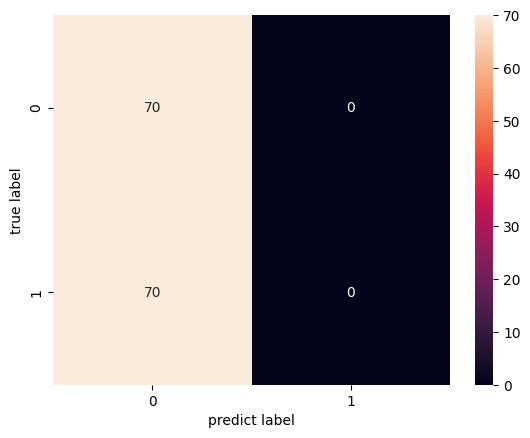

In [51]:
# visualisasi dengan confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred_test)

# Plot non-normalized confusion matrix
sns.heatmap(confusion, annot=True)
plt.ylabel('true label')
plt.xlabel('predict label')

> Confussion Matrix untuk test set Analysis: 

- Pada Confussion Matrix kali ini label 0 = cats label 1 = Dogs. Penjelasanya seperti berikut:
  1. True Positive(TP) : Model Memprediksi hasilnya adalah 1 = dogs dan actualnya memang 1 = dogs. 
  2. True Negative(TN) : Model Memprediksi hasilnya adalah 0 = cats dan actualnya memang 0 = cats.
  3. False Positive(FP) : Model memprediksi hasilnya adalah 1 = dogs tetapi actualnya adalah 0 = cats.
  4. False Negative(FN) : Model memprediksi hasilnya adalah  0 = kucing tetapi actualnya adalah 1 = dogs.

Dan dari Hasil Pengecekan Dengan Cofussion Matrix Di atas kita Dapatkan ada 70 data yang termasuk True negatif yang diprediksi oleh model sebagai cats dan memang benar cats, dan 70 false negatif atau data yang di prediksi adalah cats tetapi actualnya dia adalah dogs, dan untuk positif dan positif sama-sama tidak terdapat data sama sekali. Maka dari informasi tersebut dapat disimpulan Bahwa model Benar2 Tidak dapat mengenali label 1 (dogs) dengan menunjukan data yang terrediksi Pada Label 1 adalah 0 data, sedangkan data yang harusnya ada di label 1 seluruh datanya (70) masuk kedalam prediksi label 1. Maka dapat dikatakan model yang kita buat Underfit karena terdapat bias sehingga Model tidak bisa membaca salah satu class.

> Kelemahan Model dan data seperti apa yang akan diprediksi salah: 

- Dari Hasil Seluruh analisa pada model evaluation saya mendapati bahwa model yang sudah saya buat sama sekali tidak bisa mengenali data label 1 atau data bergambar anjing, dan memprediksikanya seluruhnya menjadi label 0 atau kucing. Sehingga model ini dapat memprediksi gambar kucing dengan cukup baik tetapi sama sekali tidak bisa memprediksi gambar anjing. Sehingga itulah yang sangat menjadi kelemahan dari model ini.

- Hal ini bisa terjadi karena arsitektur model yang kurang baik sehingga membuat model terlalu kompleks atau justru membuat model sangat tidak kompleks yang mengakibatkan model tidak dapat mengenali label dengan akurasi yang tinggi. atau menurut saya kemungkinan masih terdapat kesalahan pada tahap feature engineering, namun untuk saat ini belum bisa saya selesaikan karena terbatasan waktu. Kesalahan pada tahap feature engineering tersebu membuat bias sehingga model tidak dapat bekerja dengan baik pada data training. Atau bisa juga dikarenakan data ukuranya terlalu sedikit karena data test hanya memiliki 70 data pada masing-masing classnya sehingga dapat menghasilkan model sulit untuk mengidentifikasi class dari gambar.

- Maka dalam Hal ini saya akan menuliskan langkah yang sekiranya akan saya gunakan pada kesempatan selanjutnya untuk memperbaiki model ini sehigga dapat mencapai model yang goodfit, pada bagian further improvement

# 9 - Model Saving

> Pada bagian ini, dilakukan proses penyimpanan model dan file-file lain yang terkait dengan hasil proses pembuatan model. Pilihlah 1 arsitektur ANN yang terbaik berdasarkan hasil evaluasi sebelumnya.

In [52]:
# Save Model

model2.save('model.h5')

# 10 - Model Inference

> Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set, val-set, ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled.

# 11 - Pengambilan Kesimpulan

> Pada bagian terakhir ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan objective yang sudah ditulis di bagian pengenalan.

> Based on EDA: 

-  Dari Informasi pada bagian EDA diketahui bahwa dalam folder data train total sebanyak 557 gambar, Dan di dalam folder data train tersebut terdapat 2 folder lagi yaitu cats dan dogs, yang pada kolom cats berisi 279 gambar dan 278 gambar pada kolom dogs.

- Dan untuk folder data test total terdapat sebanyak 140 gambar, Dan di dalam folder data train tersebut terdapat 2 folder lagi yaitu cats dan dogs, yang pada kolom cats berisi 70 gambar dan 70 gambar pada kolom dogs. maka jumlah keseluruhan jika train dan test digabung terdapat 697 gambar.

- Dari Informasi pada bagian EDA dapat kita lihat informasi bahwa data gambar yang kita gunakan paling banyak berada pada size 0,1 mb - 0,3 mb. dan yang paling banyak adalah pada 0,1 mb untuk gambar pada folder train-set label dogs. Dan untuk file yg ukuranya paling besar adalah 2.0 mb yang berada pada folder test-set untuk label cats. 

- Dari Data gambar yang ditampilkan pada bagian EDA dapat kita lihat dengan jelas perbedaan dari ciri-ciri dogs dan cats, berikut adalah ciri-ciri dari masing-masing hewan

- Dogs: 
  1. Memiliki kuping yang lebih panjang
  2. Ukuranya Lebih Besar Daripada Kucing
  3. Hidungnya sangat maju seperti memiliki moncong ke arah depan.
  4. Cenderung Memiliki bentuh tubuh yang lebih berotot

- Cats:
  1. Memiliki kuping yang pendek 
  2. Ukuran badanya juga lebih kecil daripada anjing
  3. Hidungnya terlihat lebih pesek, walaupun jenis kucing non ras, teteap bentuk kepala kucing hidungnya tidak menjorok ke luar seperti anjing.
  4. Cenderung memiliki tubuh yang lebih berisi dan berlemak.

- Dari data pada bagian EDA Dapat kita lihat proporsi untuk data label pada data ini, Data ini diambil dari data train karena memiliki data yang terbanyak dan sangat representatif jika digunakan sebagai EDA, Untuk Data Label ini sendiri terbagi dengan cukup merata, dengan proporsi 50%-50%. Untuk Label cats Memiliki jumlah data sebanyak 279 gambar dan label dogs sebanyak 278 gambar. Dengan balance nya data seharusnya membuat proses modeling menjadi lebih baik karena model akan mendapatkan training dalam porsi yang sama untuk masing-masing labelnya.

> Based on Model Training:

- Hasil dari Base Model dengan CNN Sequntial API Base Model, hasilnya menunjukan performansi model yang masih jauh dari good-fit, Terdapat gap yang besar antara Train Accuracy dan juga val accuracy, modelnya juga cenderung tidak stabil, Memiliki nilai accuracy yang tinggi tetapi cenderung modelnya Overfit. Untuk Los dan val loss memiliki gap yang besar di epoch awal tetapi berdekatan di akhir epoch, tetapi nilai loss nya masih tinggi yaitu di kisaran 0.5. Maka kita akan mencoba untuk melakukan improvement pada model ini untuk mendapatkan performansi yang lebih baik.

- Hasil dari CNN Sequntial API Model Improvement, hasilnya menunjukan performansi model yang terlihat good-fit, Meskipun modelnya tidak cukup stabil tetapi memiliki nilai accuracy dan val accuracy yg tinggi, untuk val loss dan loss juga nilainya cukup rendah yaitu dibawah 0.1. Tetapi saya merasa model ini masih overfit Karena saya merasakan adanya ke anehan pada model ini, Maka selanjutnya untuk model ini akan dilakukan Evaluasi menggunakan test-set untuk melihat performa aslinya dan mengetahui apakah model ini good-fit atau over-fit. 

- Hasil Dari Model menggunakan Transfer Learning Tidak terlalu baik performanya dan masih menunjukan Overfit, Maka dari Itu Model Improvement tanpa Transfer learning masih lebih baik performansinya, sehingga untuk model ini tidak akan kami gunakan.

> Base on Model Evaluation

-  Dari ke 3 model yang sudah saya latih, untuk performansi data pelatihan yang terbaik masih ada di model CNN Sequntial API Model Improvement Karena terlihat peningkatan performansinya dibandingkan base model, dan juga grafiknya terlihat lebih normal dibanding Model dengan transfer learning. Sehingga yang akan kita gunakan untuk selanjutnya adalah model tersebut.

- Dan dari Hasil Pengecekan Dengan Cofussion Matrix Di atas kita Dapatkan ada 70 data yang termasuk True negatif yang diprediksi oleh model sebagai cats dan memang benar cats, dan 70 false negatif atau data yang di prediksi adalah cats tetapi actualnya dia adalah dogs, dan untuk positif dan positif sama-sama tidak terdapat data sama sekali. Maka dari informasi tersebut dapat disimpulan Bahwa model Benar2 Tidak dapat mengenali label 1 (dogs) dengan menunjukan data yang terrediksi Pada Label 1 adalah 0 data, sedangkan data yang harusnya ada di label 1 seluruh datanya (70) masuk kedalam prediksi label 1. Maka dapat dikatakan model yang kita buat Underfit karena terdapat bias sehingga Model tidak bisa membaca salah satu class.

- Dari Hasil Seluruh analisa pada model evaluation saya mendapati bahwa model yang sudah saya buat merupakan Under-fit, Karena model sama sekali tidak bisa mengenali data label 1 atau data bergambar anjing, dan memprediksikanya seluruhnya menjadi label 0 atau kucing. Sehingga model ini dapat memprediksi gambar kucing dengan cukup baik tetapi sama sekali tidak bisa memprediksi gambar anjing. Sehingga itulah yang sangat menjadi kelemahan dari model ini.

- Hal ini bisa terjadi karena kompleksitas model atau dikarenakan data yang digunakan memang tidak benar-benar memiliki perbedaan yang bisa dikenali oleh model, sehingga mengakibatkan hal ini dapat terjadi.

> Bussines Implementation: 

- Model ini Tidak Dapat digunakan dan masih dibutuhkan banyak pengembangan karena model Under-fit dan memiliki kelemahan yang sangat fatal karena dari Hasil Seluruh analisa pada model evaluation saya mendapati bahwa model yang sudah saya buat sama sekali tidak bisa mengenali data label 1 atau data bergambar anjing, dan memprediksikanya seluruhnya menjadi label 0 atau kucing.

- Model ini dapat memprediksi gambar kucing dengan cukup baik tetapi sama sekali tidak bisa memprediksi gambar anjing. Sehingga itulah yang sangat menjadi kelemahan dari model ini.

- Maka dari itu Model ini masih butuh perbaikan dan pengembangan lebih lanjut untuk diperbaiki performansinya sebelum bisa digunakan.

> Further Improvement: 

- Mungkin di lain kesempatan saya akan mencoba menggunakan Algoritma lain seperti CNN Functional API dan yang lain, Dan juga saya akan mencoba berbagai macam parameter untuk aristektur modelnya, Juga saya akan mencoba untuk memperbaiki tahapan-tahapan pada proses feature engineering. sehingga nantinya model yang further improvement dapat memiliki performansi yang baik.

- Mungkin untuk selanjutnya juga bisa ditambahkan sampel dari masing-masing data sehingga model memiliki lebih banyak data untuk training sehingga diharapkan model dapat mengenali lebih baik untuk masing-masing classnya.